## PROBLEM STATEMENT

### The rapid transition from internal combustion engine (ICE) vehicles to electric vehicles (EVs) is a defining shift in India’s transportation sector. Traditional ICE vehicles significantly contribute to air pollution, greenhouse gas emissions, and rising fuel dependency, which threaten environmental sustainability and energy security. With India targeting Net Zero emissions by 2070, EV adoption has become a strategic priority.

India’s heavy reliance on crude oil imports not only raises transportation costs but also exposes the economy to global price volatility. EVs, with their lower running costs and zero tailpipe emissions, offer a sustainable alternative. Government initiatives, including the FAME-II scheme, state-level subsidies, and GST reductions, have accelerated adoption, while advances in battery technology, charging infrastructure, and vehicle design are making EVs increasingly practical and affordable.

Despite this progress, EV adoption remains uneven across states, categories (2W, 3W, 4W, buses), and time periods. This project seeks to analyze EV market trends, growth patterns, and policy impacts to uncover key drivers, regional disparities, and future opportunities that can accelerate India’s transition to sustainable mobility.

## DATASET OVERVIEW

### 1. Time Trend Analysis

2. State-Level Adoption

3. Vehicle Category & Segment

4. Market Share & Composition

5. Correlation & Drivers

6. Future Insights

### LOADING LIBRAEIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING DATASET

In [4]:
df = pd.read_csv(r"C:\Users\praya\OneDrive\Documents\EV_Dataset.csv")
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


### UNDERSTANDING DATASET

In [5]:
df.shape

(96845, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


### CHECKING FOR DUPLICATE

In [8]:
df[df.duplicated]

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity


In [9]:
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

### 1. Time Trend Analysis

#### How have EV sales in India grown year-over-year (YoY) since their introduction?

In [12]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
yoy_sales = df.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()

yoy_sales

,Year,EV_Sales_Quantity
0,2014,2392.0
1,2015,7805.0
2,2016,49855.0
3,2017,87420.0
4,2018,130254.0
5,2019,166819.0
6,2020,124684.0
7,2021,331498.0
8,2022,1024723.0
9,2023,1525179.0


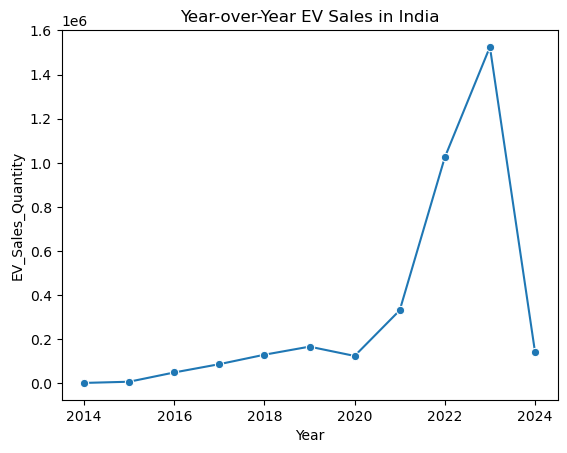

In [13]:

sns.lineplot(data=yoy_sales, x='Year', y='EV_Sales_Quantity', marker='o')
plt.title("Year-over-Year EV Sales in India")
plt.show()


#### Are there any seasonal trends or peak months?

In [20]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
monthly_sales = df.groupby('Month')['EV_Sales_Quantity'].sum().reset_index().sort_values(by='EV_Sales_Quantity', ascending=False).head(15)
monthly_sales


,Month,EV_Sales_Quantity
10,11,382217.0
11,12,364558.0
0,1,360703.0
9,10,355083.0
8,9,313433.0
2,3,299888.0
7,8,294022.0
6,7,270473.0
4,5,262747.0
3,4,232194.0


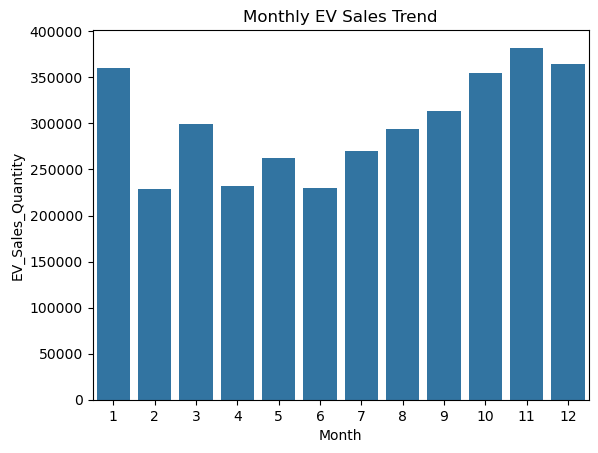

In [21]:

sns.barplot(data=monthly_sales, x='Month', y='EV_Sales_Quantity')
plt.title("Monthly EV Sales Trend")
plt.show()

### State-Level Adoption

#### Which states lead in EV adoption, and what is their contribution?

In [23]:
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)
state_sales

State
Uttar Pradesh    732074.0
Maharashtra      401535.0
Karnataka        315498.0
Delhi            268538.0
Rajasthan        228573.0
Bihar            213465.0
Tamil Nadu       206902.0
Gujarat          176713.0
Assam            151917.0
Kerala           133246.0
Name: EV_Sales_Quantity, dtype: float64

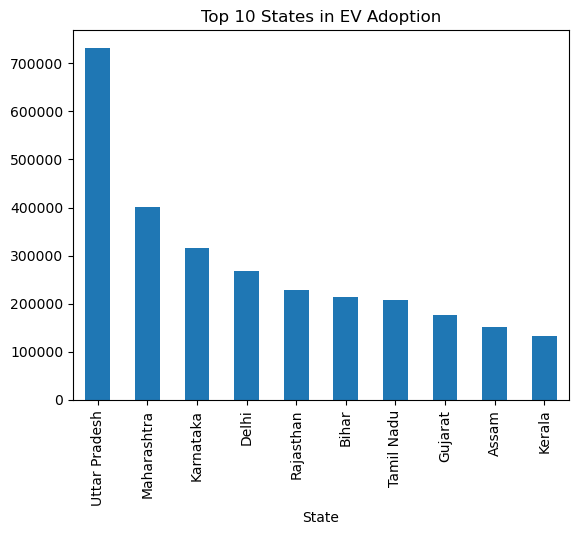

In [24]:
state_sales.plot(kind='bar')
plt.title("Top 10 States in EV Adoption")
plt.show()

### Vehicle Category & Segment

#### Which category dominates the EV market?

In [32]:
category_sales = df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().reset_index()
category_sales


,Vehicle_Category,EV_Sales_Quantity
0,2-Wheelers,1808105.0
1,3-Wheelers,1620310.0
2,4-Wheelers,149775.0
3,Bus,7009.0
4,Others,8612.0


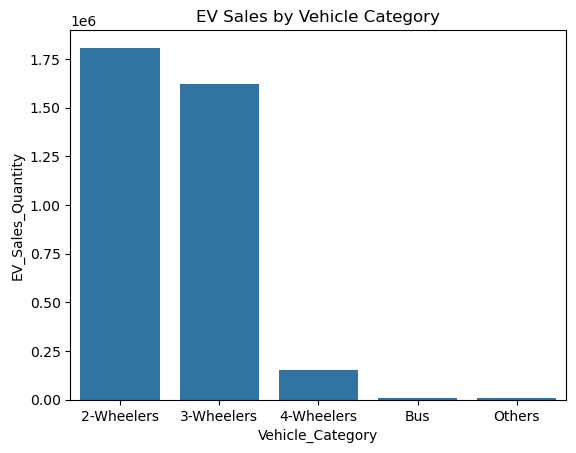

In [33]:
sns.barplot(data=category_sales, x='Vehicle_Category', y='EV_Sales_Quantity')
plt.title("EV Sales by Vehicle Category")
plt.show()

#### Growth of 2W vs 4W EVs over time?

In [34]:
growth_trend = df.groupby(['Year', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()
growth_trend



,Year,Vehicle_Category,EV_Sales_Quantity
0,2014,2-Wheelers,1679.0
1,2014,3-Wheelers,12.0
2,2014,4-Wheelers,498.0
3,2014,Bus,3.0
4,2014,Others,200.0
5,2015,2-Wheelers,1447.0
6,2015,3-Wheelers,5440.0
7,2015,4-Wheelers,761.0
8,2015,Bus,4.0
9,2015,Others,153.0


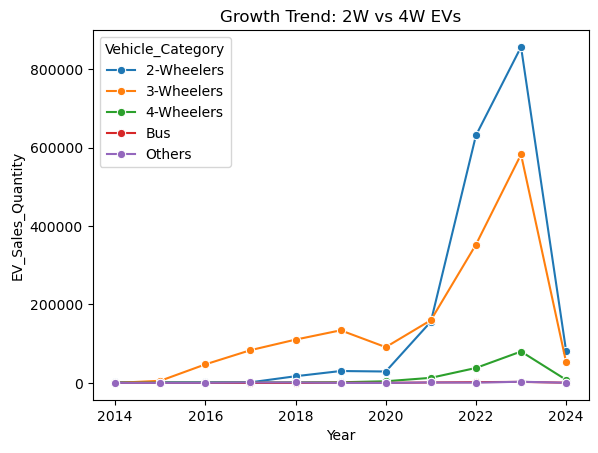

In [36]:
sns.lineplot(data=growth_trend, x='Year', y='EV_Sales_Quantity', hue='Vehicle_Category', marker='o')
plt.title("Growth Trend: 2W vs 4W EVs")
plt.show()


### Market Share & Composition

#### What % share do different vehicle categories contribute?

In [37]:
category_sales['Share'] = (category_sales['EV_Sales_Quantity'] / category_sales['EV_Sales_Quantity'].sum()) * 100
category_sales



,Vehicle_Category,EV_Sales_Quantity,Share
0,2-Wheelers,1808105.0,50.311633
1,3-Wheelers,1620310.0,45.086122
2,4-Wheelers,149775.0,4.167581
3,Bus,7009.0,0.195030
4,Others,8612.0,0.239634


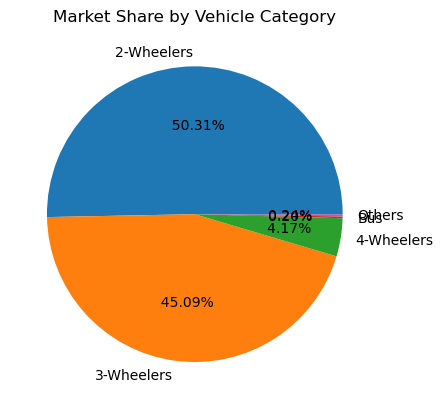

In [49]:

plt.pie(category_sales['EV_Sales_Quantity'], labels=category_sales['Vehicle_Category'], autopct='%7.2f%%',)
plt.title("Market Share by Vehicle Category")
plt.xticks(rotation=45)
plt.show()


#### Are new categories (buses, tractors, ambulances) growing?

In [53]:
new_cat = df[df['Vehicle_Category'].isin(['Bus','Tractor','Ambulance'])]
new_cat

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month
4,2014,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0,1
7,2014,jan,1/1/2014,Andhra Pradesh,EDUCATIONAL INSTITUTION BUS,Bus,Institution Bus,0.0,1
16,2014,jan,1/1/2014,Andhra Pradesh,OMNI BUS,Bus,Bus,0.0,1
26,2014,jan,1/1/2014,Arunachal Pradesh,BUS,Bus,Bus,0.0,1
46,2014,jan,1/1/2014,Assam,BUS,Bus,Bus,0.0,1
...,...,...,...,...,...,...,...,...,...
96785,2023,dec,12/1/2023,DNH and DD,BUS,Bus,Bus,0.0,12
96798,2023,dec,12/1/2023,DNH and DD,OMNI BUS,Bus,Bus,0.0,12
96806,2023,dec,12/1/2023,Delhi,BUS,Bus,Bus,348.0,12
96821,2023,dec,12/1/2023,Goa,BUS,Bus,Bus,6.0,12


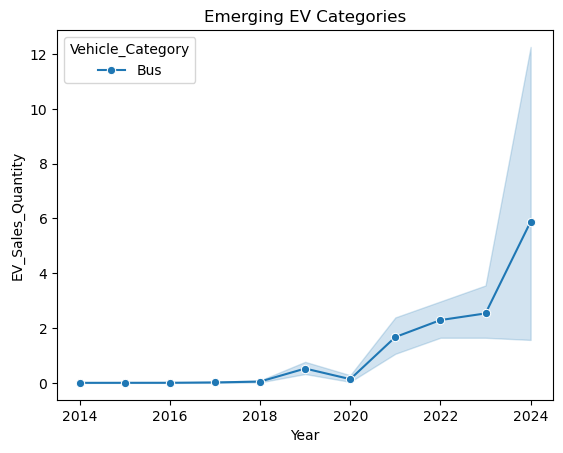

In [50]:

sns.lineplot(data=new_cat, x='Year', y='EV_Sales_Quantity', hue='Vehicle_Category', marker='o')
plt.title("Emerging EV Categories")
plt.show()


### Correlation & Drivers

#### Is EV adoption higher in metro/state capitals?

In [55]:
df['Region'] = df['State'].apply(lambda x: 'Metro' if x in ['Delhi','Maharashtra','Karnataka','Tamil Nadu'] else 'Non-Metro')
region_sales = df.groupby('Region')['EV_Sales_Quantity'].sum().reset_index()

region_sales


,Region,EV_Sales_Quantity
0,Metro,1192473.0
1,Non-Metro,2401338.0


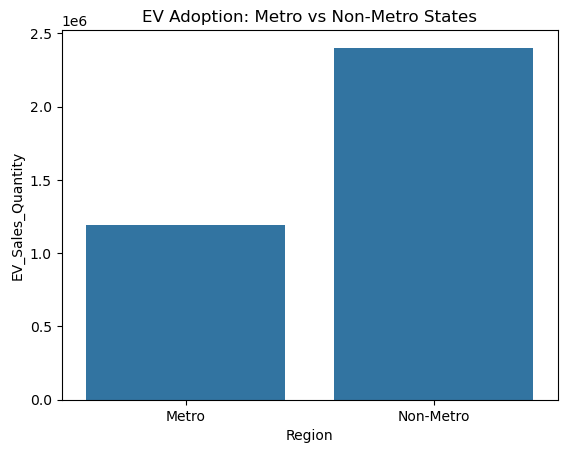

In [56]:
sns.barplot(data=region_sales, x='Region', y='EV_Sales_Quantity')
plt.title("EV Adoption: Metro vs Non-Metro States")
plt.show()

#### Do sales spikes align with policies (FAME-II etc.)?

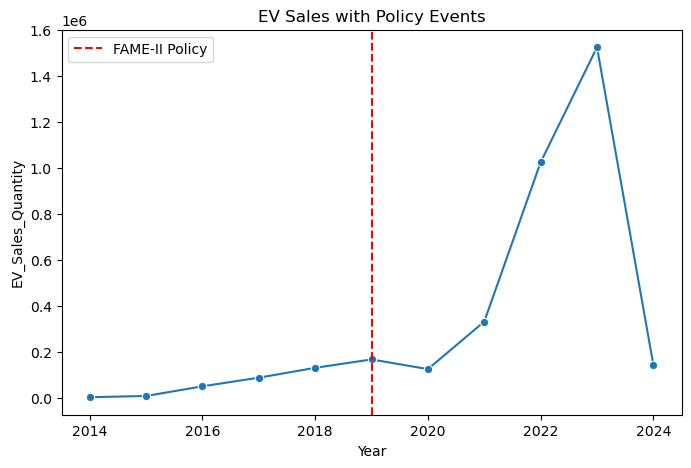

In [57]:
# Example: Mark 2019 (FAME-II Launch)
plt.figure(figsize=(8,5))
sns.lineplot(data=yoy_sales, x='Year', y='EV_Sales_Quantity', marker='o')
plt.axvline(x=2019, color='red', linestyle='--', label="FAME-II Policy")
plt.legend()
plt.title("EV Sales with Policy Events")
plt.show()


### Future Insights

#### Projected EV adoption (next 5 years)?

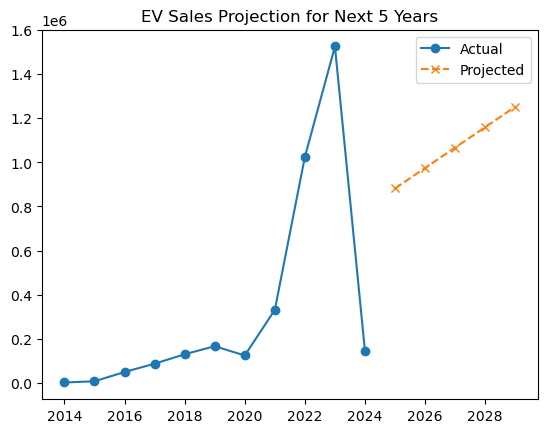

In [58]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = yoy_sales['Year'].values.reshape(-1,1)
y = yoy_sales['EV_Sales_Quantity'].values

model = LinearRegression()
model.fit(X, y)

future_years = np.array(range(2025, 2030)).reshape(-1,1)
future_pred = model.predict(future_years)

plt.plot(yoy_sales['Year'], y, marker='o', label="Actual")
plt.plot(future_years, future_pred, marker='x', linestyle='--', label="Projected")
plt.title("EV Sales Projection for Next 5 Years")
plt.legend()
plt.show()


#### Which states/segments show the highest potential?

In [60]:
state_year = df.groupby(['Year','State'])['EV_Sales_Quantity'].sum().reset_index()

state_year

,Year,State,EV_Sales_Quantity
0,2014,Andaman & Nicobar Island,0.0
1,2014,Andhra Pradesh,12.0
2,2014,Arunachal Pradesh,0.0
3,2014,Assam,2.0
4,2014,Bihar,12.0
...,...,...,...
369,2024,Tamil Nadu,8715.0
370,2024,Tripura,507.0
371,2024,Uttar Pradesh,27833.0
372,2024,Uttarakhand,1234.0
